# 📘 Water Quality Analysis Report

This notebook performs an exploratory data analysis (EDA) and visualization of water quality parameters over time. Various chemical pollutants such as NH₄ (Ammonium), SO₄ (Sulfate), NO₃ (Nitrate), and others are examined across different timeframes, including seasonal and yearly perspectives.

---

## 📊 Dataset Overview

The dataset contains temporal data of water quality measurements. It includes:

- **Date and Year** of observation  
- **Pollutants** such as NH₄, NO₃, NO₂, SO₄, PO₄, BSK5, etc.  
- **Suspended solids**, **Dissolved Oxygen**, and **Carbon**

Each row represents a snapshot of water quality at a given time. The goal is to visualize and understand trends, thresholds, and relationships between these variables.

##Importing necessary libraries


In [ ]:
#necessary library
import numpy as np
import pandas as pd


from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score


##Loading dataset

In [ ]:
#load
df=pd.read_csv('afa2e701598d20110228.csv',sep=';')
df.head()


,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


#EDA activities


In [ ]:
df.info() #info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB


In [ ]:
df.shape  #row col

(2861, 11)

In [ ]:
#statictics
df.describe()

,id,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
count,2861.000000,2858.000000,2860.000000,2845.000000,2858.000000,2860.000000,2858.000000,2812.000000,2833.000000,2812.000000
mean,12.397064,0.758734,4.316182,12.931905,9.508902,4.316846,0.246128,59.362313,0.418626,93.731991
std,6.084226,2.486247,2.973997,16.543097,4.428260,6.881188,2.182777,96.582641,0.771326,394.512184
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000
25%,8.000000,0.080000,2.160000,6.000000,7.092500,1.390000,0.030000,27.052500,0.130000,26.800000
50%,14.000000,0.220000,3.800000,10.000000,8.995000,2.800000,0.059000,37.800000,0.270000,33.900000
75%,16.000000,0.500000,5.800000,15.000000,11.520000,5.582500,0.125750,64.640000,0.470000,45.607500
max,22.000000,39.427000,50.900000,595.000000,90.000000,133.400000,109.000000,3573.400000,13.879000,5615.280000


In [ ]:
#missing vals
df.isnull().sum()

,0
id,0
date,0
NH4,3
BSK5,1
Suspended,16
O2,3
NO3,1
NO2,3
SO4,49
PO4,28


In [ ]:
#date is in object convert to date format
df['date']=pd.to_datetime(df['date'],format='%d.%m.%Y')

In [ ]:

#impute missing values for chlorine and S04 with the mean
df['CL']=df['CL'].fillna(df['CL'].mean())
df['SO4']=df['SO4'].fillna(df['SO4'].mean())
#remove any cols with missing values
df = df.dropna(axis=0)

In [ ]:
df.isnull().sum()

,0
id,0
date,0
NH4,0
BSK5,0
Suspended,0
O2,0
NO3,0
NO2,0
SO4,0
PO4,0


In [ ]:
df=df.sort_values(by=['id','date'])#convert to age
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


In [ ]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month,day
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2000,2,17
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000,5,11
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000,9,11
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000,12,13
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001,3,2


In [ ]:
df.columns

Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
pollutants=['NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL']

#Data visualization

#**1**.line plot for nitrogen compounds


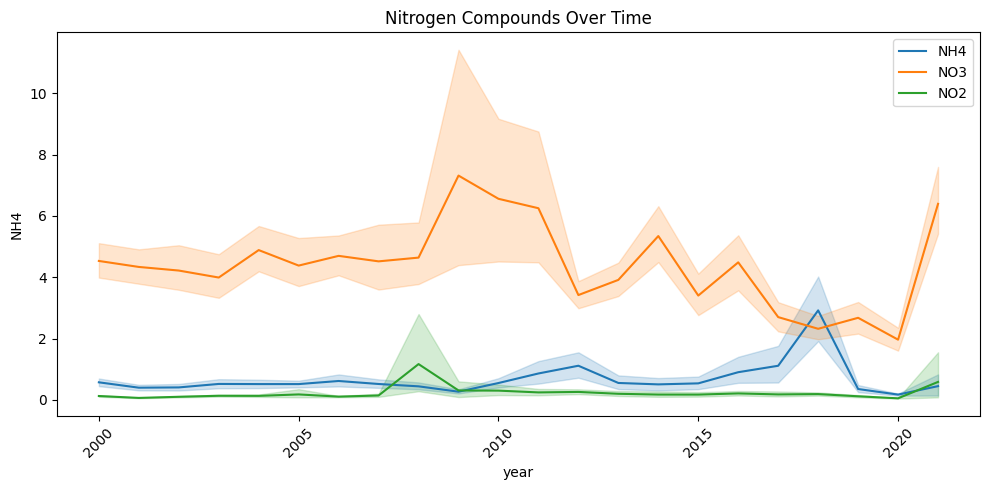

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='year', y='NH4', label='NH4')
sns.lineplot(data=df, x='year', y='NO3', label='NO3')
sns.lineplot(data=df, x='year', y='NO2', label='NO2')
plt.title('Nitrogen Compounds Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The concentration of nitrogen compound hiked nearly in 2008 and it is slowly increasing in water

# **2.** Bar Plot of Average Values per Year

<Figure size 1000x500 with 0 Axes>

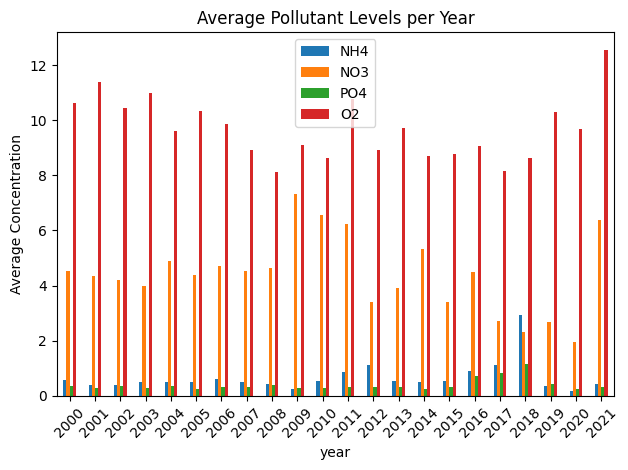

In [ ]:

plt.figure(figsize=(10, 5))
avg_year = df.groupby('year').mean(numeric_only=True)
avg_year[['NH4', 'NO3', 'PO4', 'O2']].plot(kind='bar')
plt.title('Average Pollutant Levels per Year')
plt.ylabel('Average Concentration')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


AVG concentrations of 02 decreased till 2010 then increased while for nh4 it was max in 2018 otherwise in control so there may be some industry which throwed it in water similarly for po4 it was higher during 2017,18

# **3.** heatmap

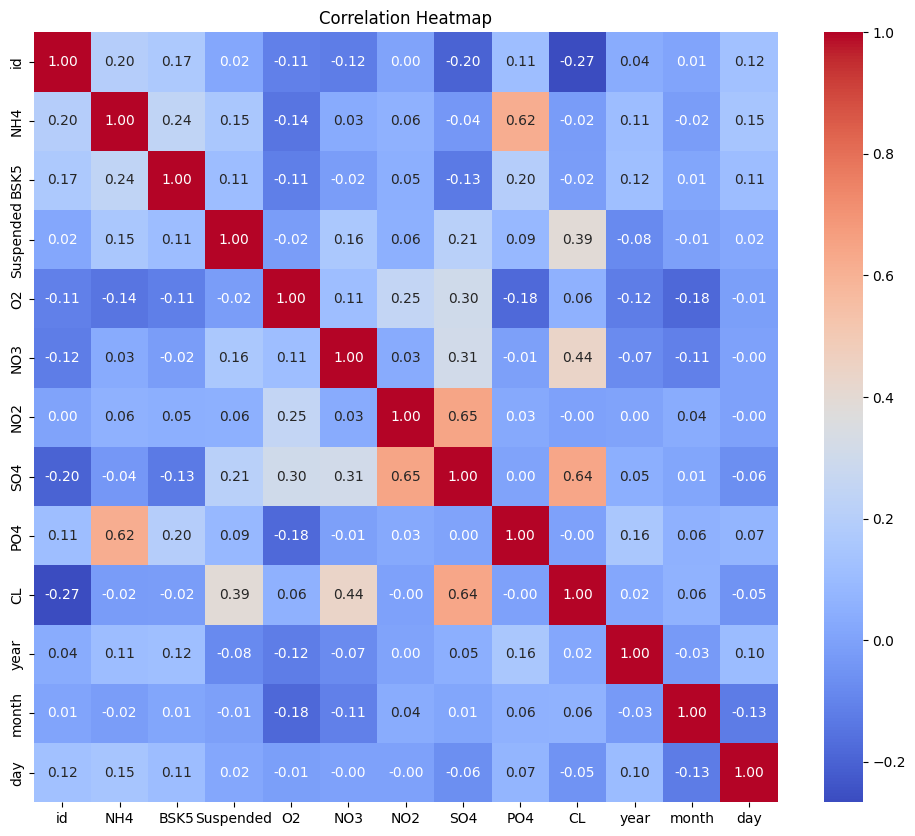

In [ ]:


corre_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corre_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


SO4 CL has some correlation similarly NO2 SO4 also positive higher value suggest both increase and decrease in similar trend

#4. Seasonality Analysis (reg plots by month)

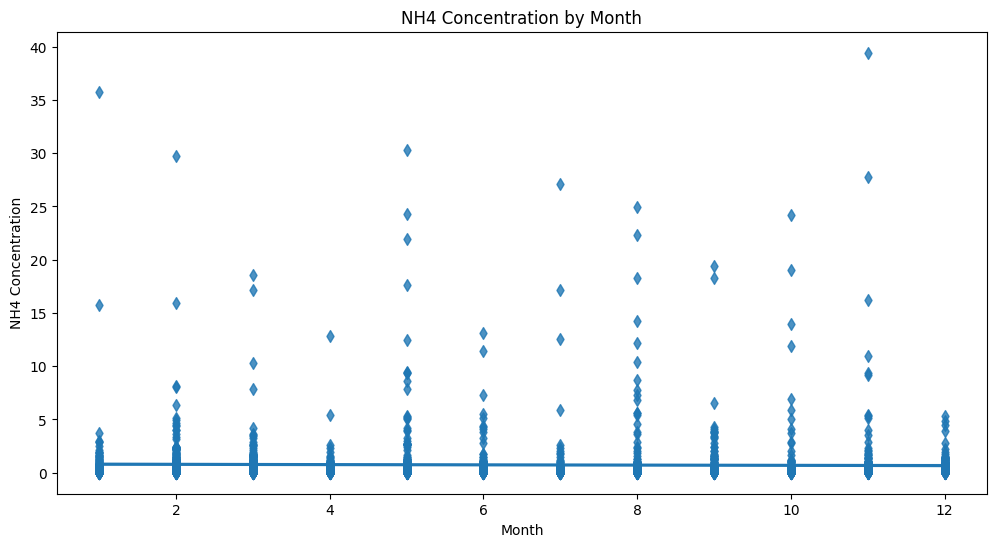

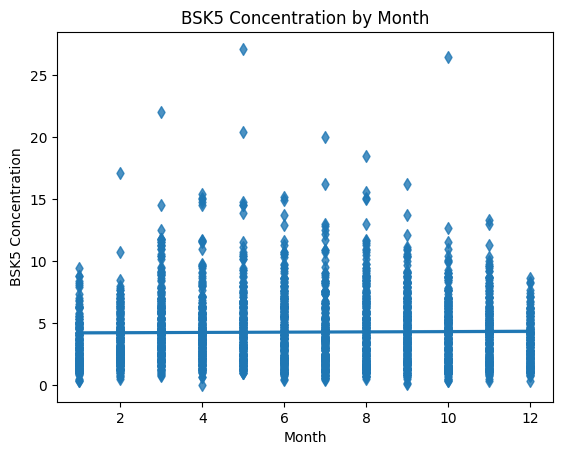

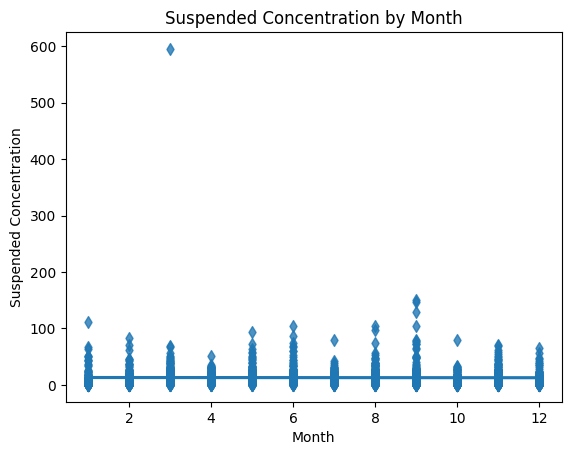

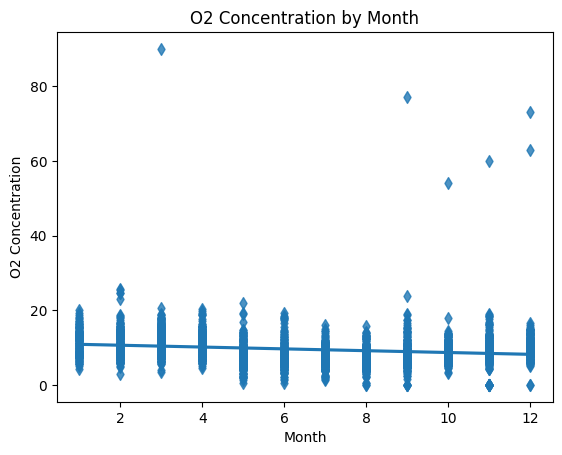

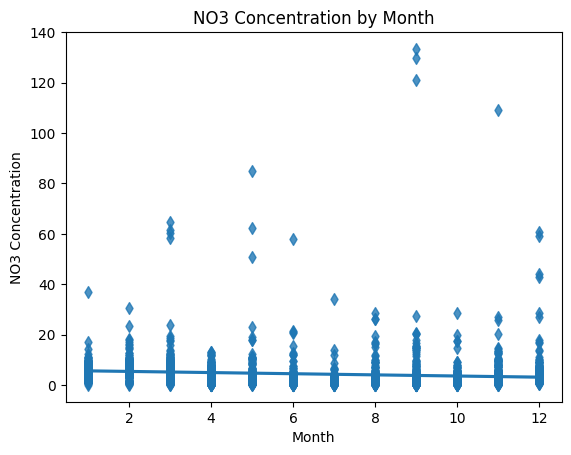

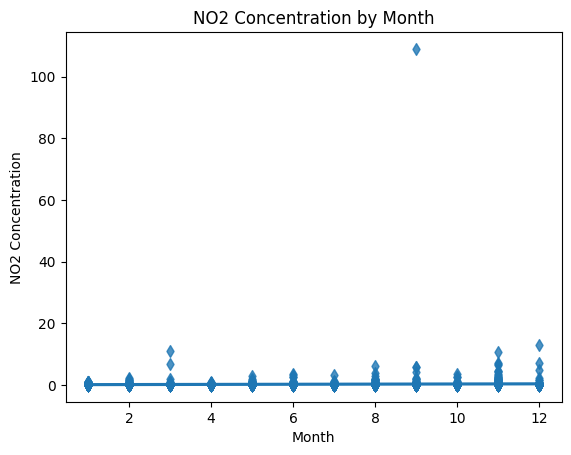

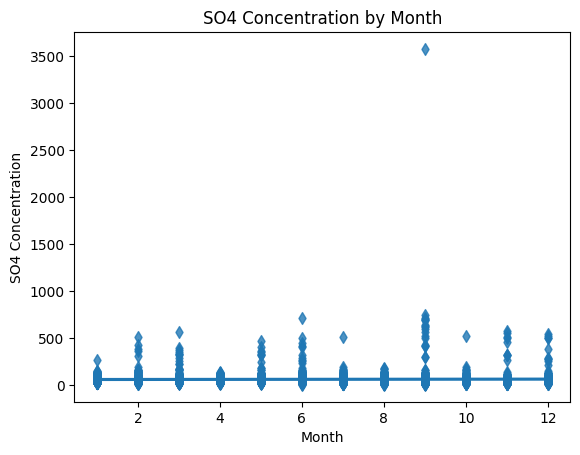

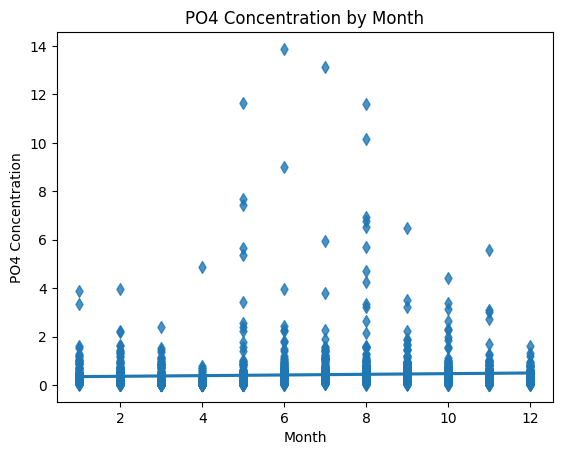

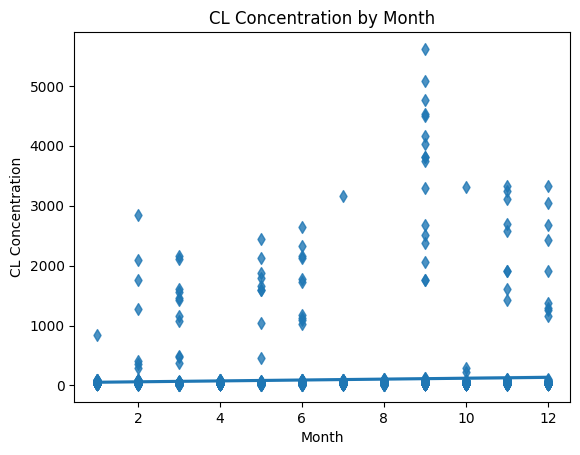

In [ ]:

plt.figure(figsize=(12, 6))
for pollutant in pollutants:
    sns.regplot(data=df, x='month', y=pollutant,marker='d')
    plt.title(f'{pollutant} Concentration by Month')
    plt.xlabel('Month')
    plt.ylabel(f'{pollutant} Concentration')
    plt.show()


From Regline we can see that how the avg value of concentration change over the season

# 5. Highlight NH4 Threshold Exceedance

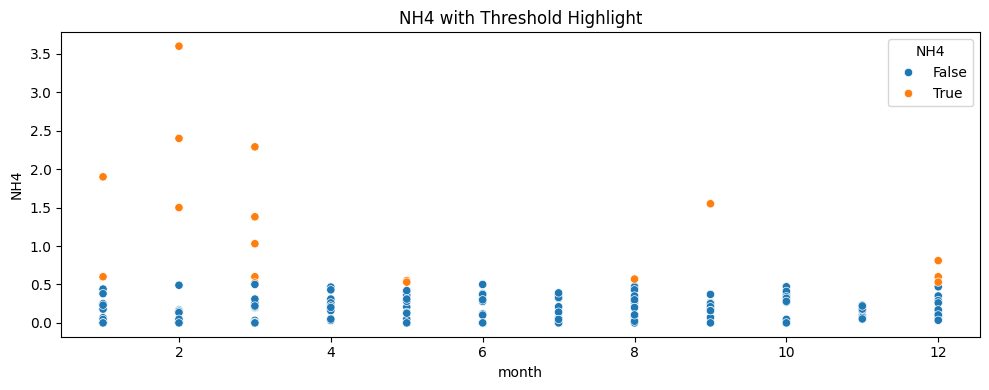

In [ ]:

last_3_years = df['year'].max() - 2
df_last_3_years = df[df['year'] >= last_3_years].copy()

plt.figure(figsize=(10, 4))
sns.scatterplot(data=df_last_3_years, x='month', y='NH4', hue=(df['NH4'] > 0.5))

plt.title('NH4 with Threshold Highlight')
plt.tight_layout()
plt.show()

in last 3 yrs nh4 exceeded its limit 15 times


# 6. take mean value of concentration of all pollutant for particular yr and generate line chart generate seperate line for each pollutant


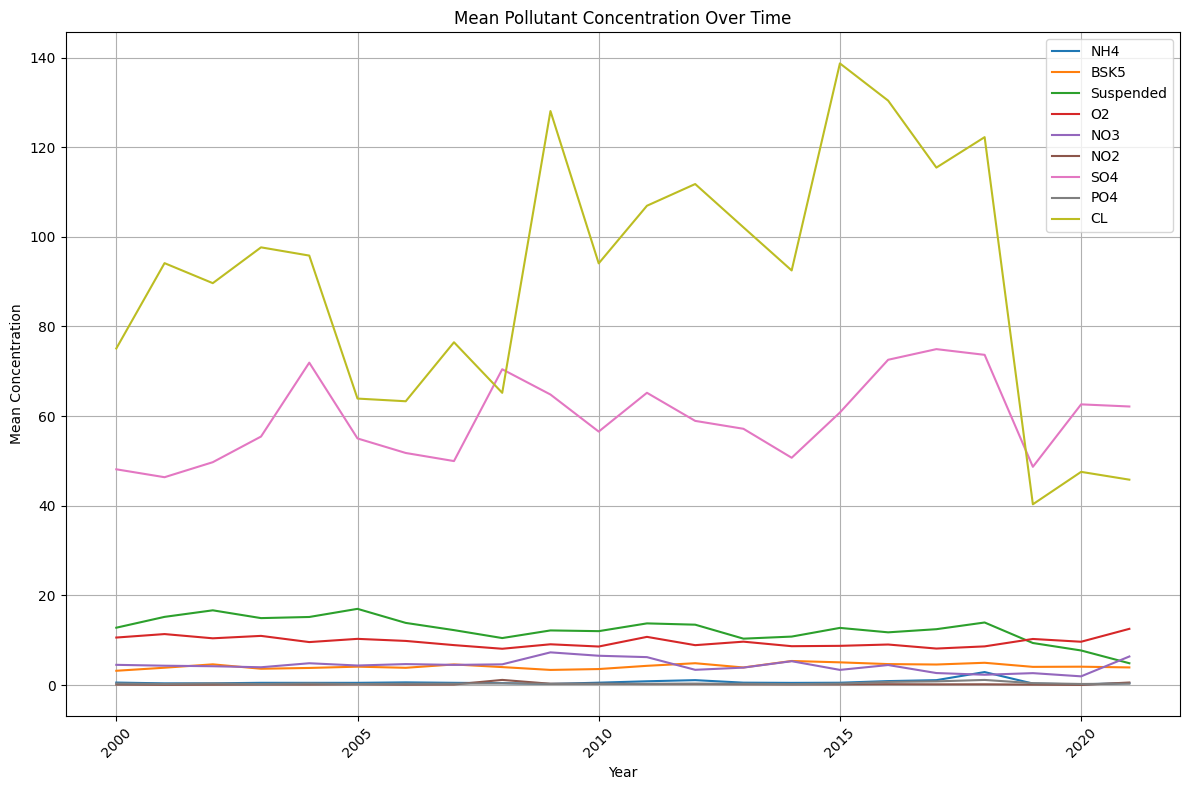

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

mean_concentration_by_year = df.groupby('year')[pollutants].mean()

# Plot a line chart for each pollutant
plt.figure(figsize=(12, 8))
for pollutant in pollutants:
    plt.plot(mean_concentration_by_year.index, mean_concentration_by_year[pollutant], label=pollutant)

plt.title('Mean Pollutant Concentration Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Concentration')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Fron graph you can see the avg variation of different pollutants in each year and can compare it with threshold value to make improvements .

# 7. Pie Chart of Total Concentration for the Last Year

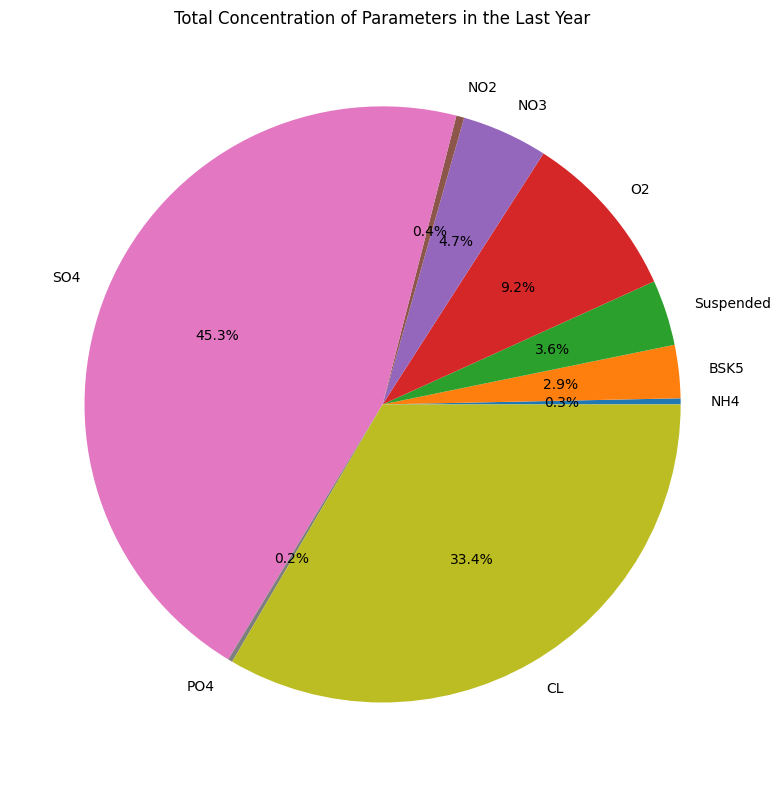

In [ ]:


last_year = df[df['year'] == df['year'].max()]
last_year_sum = last_year[pollutants].sum()

plt.figure(figsize=(8, 8))
plt.pie(last_year_sum, labels=last_year_sum.index, autopct='%1.1f%%', explode=[0.5 if p==last_year_sum.idxmin() else 0 for p in last_year_sum])


plt.title('Total Concentration of Parameters in the Last Year')

plt.tight_layout()
plt.show()


From 2020 data we can find that so4 concentration is maximum in water.

 # 8. Line chart for SO4 with threshold line and fill between

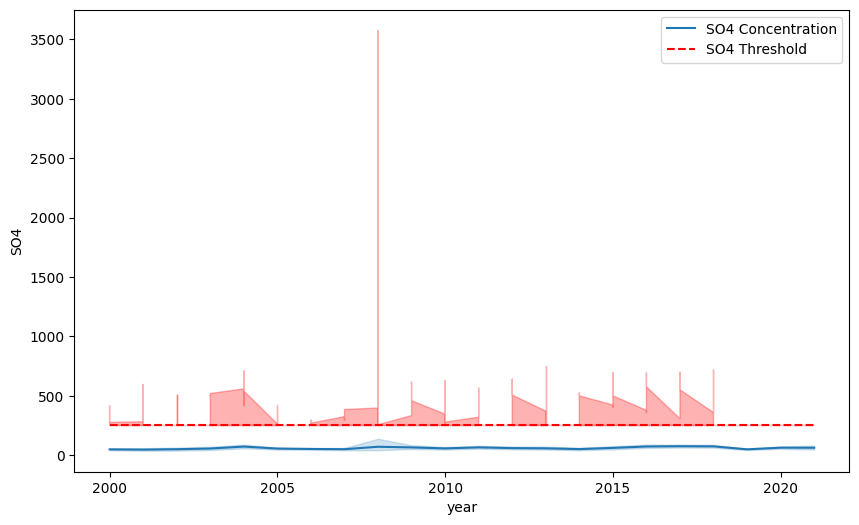

In [ ]:


plt.figure(figsize=(10, 6))


a=sns.lineplot(data=df, x='year', y='SO4', label='SO4 Concentration')


so4_threshold = 250


sns.lineplot(data=df,y=so4_threshold,x='year', color='red', linestyle='--', label='SO4 Threshold')


plt.fill_between(df['year'], df['SO4'].values, so4_threshold,
                 where=(df['SO4'].values > so4_threshold), color='red', alpha=0.3,
                )



#  WEEK 2 23 june


In [ ]:


print("Shape before outlier removal:", df.shape)

for pollutant in pollutants:
    Q1 = df[pollutant].quantile(0.25)
    Q3 = df[pollutant].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[pollutant] >= lower_bound) & (df[pollutant] <= upper_bound)]

print("Shape after outlier removal:", df.shape)

Shape before outlier removal: (2811, 14)
Shape after outlier removal: (1814, 14)


In [154]:
#Feature(independent) and target selection
X=df[['id','year','month']]
y=df[pollutants]

In [155]:
#Encoding onehot because id are name of cities and not ordinal so onehot is best
X_encoded=pd.get_dummies(X,columns=['id'],drop_first=True)

In [156]:
X_encoded.head()

,year,month,id_3,id_4,id_5,id_6,id_7,id_8,id_9,id_10,...,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22
77,2000,4,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
78,2000,7,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
79,2000,11,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
81,2001,5,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
82,2001,8,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [157]:
#Train,test,Split
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,test_size=0.2,random_state=42)

In [170]:
model1= MultiOutputRegressor(VotingRegressor(estimators=[
    ('rf', RandomForestRegressor(n_estimators=150, random_state=42)),
    ('lr', LinearRegression())
]))
model1.fit(X_train,y_train)


MultiOutputRegressor(estimator=VotingRegressor(estimators=[('rf',
                                                            RandomForestRegressor(n_estimators=150,
                                                                                  random_state=42)),
                                                           ('lr',
                                                            LinearRegression())]))

In [171]:
#Evaluate

y_pred=model1.predict(X_test)


In [172]:
print("model performance on test data")
for i,pollutant in enumerate(pollutants):
   print(f"{pollutant}:")
   print(f"MSE: {mean_squared_error(y_test.iloc[:,i],y_pred[:,i])}")
   print(f"R2: {r2_score(y_test.iloc[:,i],y_pred[:,i])}")

model performance on test data
NH4:
MSE: 0.03032157722671444
R2: 0.39732495237725773
BSK5:
MSE: 3.2833998586105153
R2: 0.37361758853637383
Suspended:
MSE: 20.065189806792507
R2: 0.2688517176927565
O2:
MSE: 5.52447667088182
R2: 0.3724332252086642
NO3:
MSE: 2.883963112797873
R2: 0.45834936127025483
NO2:
MSE: 0.0014339634723464847
R2: 0.1364906902463887
SO4:
MSE: 159.53856633213502
R2: 0.7856845562262398
PO4:
MSE: 0.02081594055342081
R2: 0.4049286604547059
CL:
MSE: 37.07739502357958
R2: 0.740153349472404


In [173]:
# Define the water quality thresholds
thresholds = {
    'NH4': 0.5,
    'BSK5': 3.0,
    'Suspended': 25.0,
    'O2': 5.0,
    'NO3': 10.0,
    'NO2': 0.1,
    'SO4': 250.0,
    'PO4': 0.1,
    'CL': 250.0
}

# Function to predict the percentage of safe water based on predicted pollutant levels
def predict_safe_water_percentage(predicted_pollutants, thresholds):
    safe_count = 0
    total_pollutants = len(pollutants)

    for i, pollutant in enumerate(pollutants):
        predicted_value = predicted_pollutants[i]
        threshold = thresholds.get(pollutant)

        # For O2, the value should be ABOVE the threshold
        if pollutant == 'O2':
            if predicted_value >= threshold:
                safe_count += 1
        else:  # For all other pollutants, value should be BELOW the threshold
            if predicted_value <= threshold:
                safe_count += 1

    safe_percentage = (safe_count / total_pollutants) * 100
    return safe_percentage

# Input details
station_id = '22'
year_input = 2024
month_input = 6  # Example month: June

# Create input DataFrame including month
input_data = pd.DataFrame({'year': [year_input], 'month': [month_input], 'id': [station_id]})

# Encode categorical columns
input_encoded = pd.get_dummies(input_data, columns=['id'])

# Align with training feature columns
missing_cols = set(X_encoded.columns) - set(input_encoded.columns)
for col in missing_cols:
    input_encoded[col] = 0
input_encoded = input_encoded[X_encoded.columns]  # reorder columns to match training data

# Predict pollutant levels
predicted_pollutants = model1.predict(input_encoded)[0]

print(f"\nPredicted pollutant levels for station '{station_id}' in {year_input}, month {month_input}:")
for p, val in zip(pollutants, predicted_pollutants):
    print(f"  {p}: {val:.2f}")

# Calculate and print the predicted safe water percentage
predicted_safe_percentage = predict_safe_water_percentage(predicted_pollutants, thresholds)
print(f"\nPredicted percentage of water quality parameters within safe limits: {predicted_safe_percentage:.2f}%")



Predicted pollutant levels for station '22' in 2024, month 6:
  NH4: 0.01
  BSK5: 2.20
  Suspended: 5.96
  O2: 11.05
  NO3: 3.49
  NO2: 0.03
  SO4: 105.43
  PO4: 0.38
  CL: 59.85

Predicted percentage of water quality parameters within safe limits: 88.89%


In [174]:
import joblib

joblib.dump(model1, 'pollution_model.pkl')
joblib.dump(X_encoded.columns.tolist(), "model_columns.pkl")
print('Model and cols structure are saved!')

Model and cols structure are saved!
